## 1) Import Libraries

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 2) Read Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
images = pd.read_csv('/content/drive/My Drive/Data/CSV Converted Small Images (Colour).csv',header=None)
images

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7460,7461,7462,7463,7464,7465,7466,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476,7477,7478,7479,7480,7481,7482,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,0.689362,0.744681,0.778723,0.582979,0.629787,0.663830,0.595745,0.629787,0.672340,0.608511,0.634043,0.689362,0.531915,0.553191,0.608511,0.591489,0.600000,0.642553,0.731915,0.744681,0.787234,0.702128,0.723404,0.765957,0.697872,0.727660,0.765957,0.731915,0.770213,0.800000,0.761702,0.791489,0.821277,0.723404,0.736170,0.770213,0.693617,0.697872,0.740425,0.757447,...,0.876596,0.791489,0.804255,0.838298,0.761702,0.774468,0.808511,0.774468,0.761702,0.782979,0.765957,0.744681,0.753192,0.693617,0.672340,0.676596,0.753192,0.736170,0.757447,0.778723,0.791489,0.825532,0.765957,0.787234,0.834043,0.842553,0.842553,0.889362,0.748936,0.736170,0.770213,0.689362,0.672340,0.697872,0.659574,0.634043,0.655319,0.587234,0.561702,0.591489
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,0.618110,0.645669,0.677165,0.590551,0.622047,0.649606,0.614173,0.645669,0.673228,0.610236,0.649606,0.681102,0.559055,0.598425,0.625984,0.625984,0.665354,0.692913,0.649606,0.692913,0.708661,0.661417,0.696850,0.728346,0.677165,0.712598,0.748031,0.653543,0.692913,0.720472,0.625984,0.665354,0.692913,0.614173,0.653543,0.685039,0.661417,0.688976,0.716535,0.618110,...,0.763780,0.685039,0.720472,0.732283,0.724409,0.759842,0.771654,0.692913,0.728346,0.744094,0.681102,0.704724,0.724409,0.704724,0.716535,0.736220,0.712598,0.728346,0.748031,0.732283,0.748031,0.767717,0.728346,0.744094,0.763780,0.728346,0.744094,0.763780,0.720472,0.736220,0.755906,0.685039,0.700787,0.720472,0.732283,0.748031,0.767717,0.728346,0.744094,0.763780
3,0.117647,0.117647,0.117647,0.145098,0.145098,0.145098,0.133333,0.133333,0.133333,0.133333,0.141176,0.141176,0.113726,0.129412,0.133333,0.713726,0.733333,0.737255,0.615686,0.627451,0.647059,0.533333,0.552941,0.564706,0.541177,0.568627,0.584314,0.521569,0.549020,0.576471,0.611765,0.647059,0.666667,0.576471,0.615686,0.635294,0.607843,0.635294,0.674510,0.368627,...,0.650980,0.788235,0.823530,0.878431,0.866667,0.890196,0.941177,0.741177,0.760784,0.819608,0.705882,0.729412,0.780392,0.878431,0.901961,0.945098,0.937255,0.960784,1.000000,0.933333,0.952941,0.964706,0.878431,0.901961,0.925490,0.674510,0.701961,0.737255,0.537255,0.556863,0.584314,0.517647,0.533333,0.545098,0.482353,0.486275,0.486275,0.262745,0.254902,0.254902
4,0.893720,0.913043,0.884058,0.893720,0.913043,0.884058,0.898551,0.917874,0.888889,0.898551,0.917874,0.888889,0.898551,0.917874,0.888889,0.898551,0.917874,0.888889,0.903382,0.927536,0.884058,0.893720,0.927536,0.893720,0.893720,0.927536,0.903382,0.903382,0.932367,0.908212,0.903382,0.932367,0.908212,0.903382,0.932367,0.908212,0.903382,0.927536,0.917874,0.903382,...,0.975845,0.951691,0.985507,0.971014,0.951691,0.985507,0.971014,0.946860,0.975845,0.971014,0.942029,0.975845,0.961353,0.937198,0.971014,0.946860,0.932367,0.966184,0.951691,0.922705,0.956522,0.942029,0.922705,0.956522,0.942029,0.922705,0.946860,0.937198,0.913043,0.942029,0.917874,0.913043,0.942029,0.913043,0.903382,0.937198,0.903382,0.898551,0.932367,0.898551
...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
print("There are", len(images), "converted processed images read from csv file")

There are 1099 converted processed images read from csv file


## 3) Cleaning Images from NA values and Converting Numpy format

In [ ]:
images_no_na= images.dropna()
cleaned_images = images_no_na.drop_duplicates()
data = cleaned_images.to_numpy()

print("After dropping images with NA values and duplicate images, there are", len(data), "cleaned images")

After dropping images with NA values and duplicate images, there are 911 cleaned images


## 4) Splitting the images into Training and Testings sets

In [ ]:
from sklearn.model_selection import train_test_split
train_x, val_x= train_test_split(data, test_size=0.20, random_state=42)

In [ ]:
print('Reshaped Training set shape  : ', train_x.shape, '. Training set size  : ',train_x.size)
print('Reshaped Testing set shape   : ', val_x.shape, '. Testing set size   : ', val_x.size)

Reshaped Training set shape  :  (728, 7500) . Training set size  :  5460000
Reshaped Testing set shape   :  (183, 7500) . Testing set size   :  1372500


## 5) Reshaping Images for both sets


100%|██████████| 728/728 [00:00<00:00, 373693.96it/s]


There are 728 reshaped images and it is <class 'list'> type




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


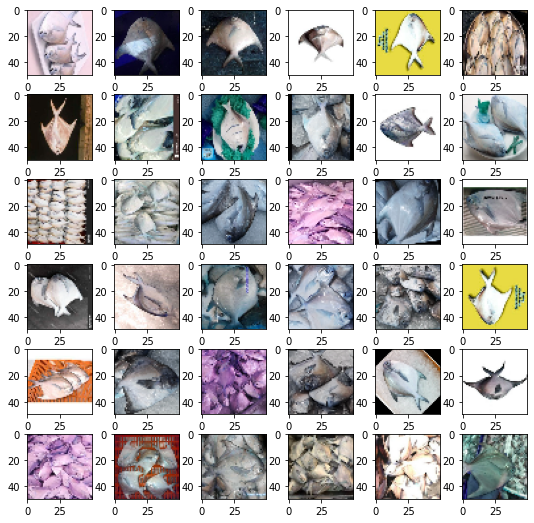

In [ ]:
# reshaping image
train_x_reshaped = []
from tqdm import tqdm

for index in tqdm(range(len(train_x))):
  reshaped_image = train_x[index].reshape((50, 50, 3))
  train_x_reshaped.append(reshaped_image)


print("\nThere are", len(train_x_reshaped) , "reshaped images and it is", type(train_x_reshaped), "type\n")


fig, axes = plt.subplots(6, 6, figsize=(9, 9))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i, ax in enumerate(axes.flat):
    # Plot image.
    ax.imshow(train_x_reshaped[i])

100%|██████████| 183/183 [00:00<00:00, 322367.76it/s]



There are 183 reshaped images and it is <class 'list'> type



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


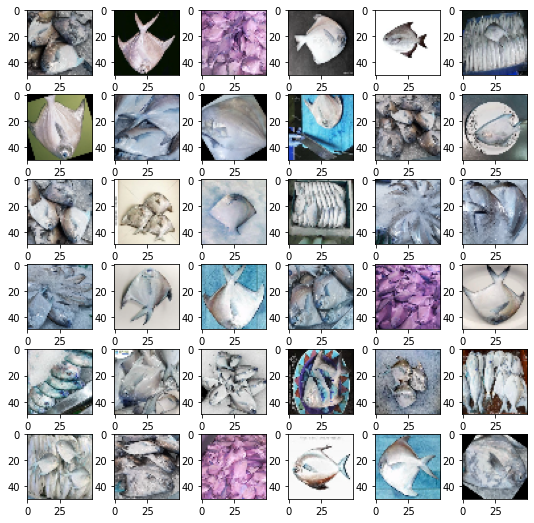

In [ ]:
# reshaping image
val_x_reshaped = []

for index in tqdm(range(len(val_x))):
  reshaped_image = val_x[index].reshape((50, 50, 3))
  val_x_reshaped.append(reshaped_image)


print("\nThere are", len(val_x_reshaped) , "reshaped images and it is", type(val_x_reshaped), "type\n")


fig, axes = plt.subplots(6, 6, figsize=(9, 9))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i, ax in enumerate(axes.flat):
    # Plot image.
    ax.imshow(val_x_reshaped[i])

## 6) Creating Pixelated Images for both sets

100%|██████████| 728/728 [00:00<00:00, 11993.80it/s]



There are 728 low resolution images and it is <class 'list'> type



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


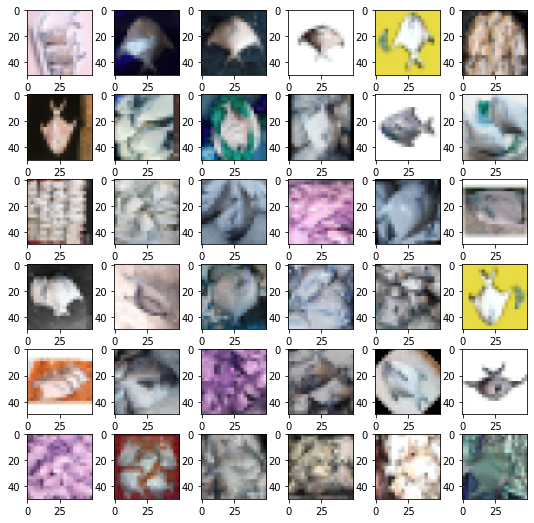

In [ ]:
import cv2 as cv

#reduce image resolution while keeping the image size constant
train_low_res_images = []

for index in tqdm(range(len(train_x_reshaped))):
  #reduce image resolution
  small_image = cv.resize(train_x_reshaped[index], (int(50*40/100), int(50*40/100)), interpolation = cv.INTER_AREA)
  
  # scale back to original size
  low_res_image = cv.resize(small_image, (int(50), int(50)), interpolation = cv.INTER_AREA)

  train_low_res_images.append(low_res_image)


print("\nThere are", len(train_low_res_images) , "low resolution images and it is", type(train_low_res_images), "type\n")


fig, axes = plt.subplots(6, 6, figsize=(9, 9))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i, ax in enumerate(axes.flat):
    # Plot image.
    ax.imshow(train_low_res_images[i], cmap='binary')

100%|██████████| 183/183 [00:00<00:00, 9012.91it/s]



There are 183 low resolution images and it is <class 'list'> type



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


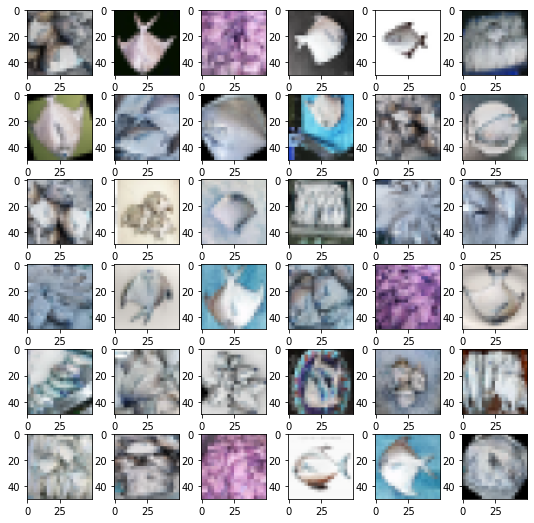

In [ ]:
#reduce image resolution while keeping the image size constant
val_low_res_images = []

for index in tqdm(range(len(val_x_reshaped))):
  #reduce image resolution
  small_image = cv.resize(val_x_reshaped[index], (int(50*40/100), int(50*40/100)), interpolation = cv.INTER_AREA)
  
  # scale back to original size
  low_res_image = cv.resize(small_image, (int(50), int(50)), interpolation = cv.INTER_AREA)

  val_low_res_images.append(low_res_image)


print("\nThere are", len(val_low_res_images) , "low resolution images and it is", type(val_low_res_images), "type\n")


fig, axes = plt.subplots(6, 6, figsize=(9, 9))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i, ax in enumerate(axes.flat):
    # Plot image.
    ax.imshow(val_low_res_images[i], cmap='binary')

## 7) Determining Image shapes for all sets

In [ ]:
print('Reshaped Training set shape  : ', train_x_reshaped[0].shape, '. Reshaped Training set size  : ',train_x_reshaped[0].size)
print('Reshaped Testing set shape   : ', val_x_reshaped[0].shape, '. Reshaped Testing set size   : ', val_x_reshaped[0].size)

Reshaped Training set shape  :  (50, 50, 3) . Reshaped Training set size  :  7500
Reshaped Testing set shape   :  (50, 50, 3) . Reshaped Testing set size   :  7500


In [ ]:
print('Pixelated Training set shape  : ', train_low_res_images[0].shape, '. Pixelated Training set size  : ', train_low_res_images[0].size)
print('Pixelated Testing set shape   : ', val_low_res_images[0].shape, '. Pixelated Testing set size   : ', val_low_res_images[0].size)

Pixelated Training set shape  :  (50, 50, 3) . Pixelated Training set size  :  7500
Pixelated Testing set shape   :  (50, 50, 3) . Pixelated Testing set size   :  7500


## 8) Converting into Numpy Array

In [ ]:
train_x_reshaped = np.array(train_x_reshaped)
val_x_reshaped = np.array(val_x_reshaped)
train_low_res_images = np.array(train_low_res_images)
val_low_res_images = np.array(val_low_res_images)

## 9) Training & Validating Neural Network Model on the Images

### 9.1) Importing Library for Modelling

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import Model, Input, regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing import image

import glob
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')

Using TensorFlow backend.


### 9.2) Building Neural Network Architecture


In [ ]:
Input_img = Input(shape=(50, 50, 3))
    
#encoding architecture
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(Input_img)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x2 = MaxPool2D( (2, 2))(x2)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)

# decoding architecture
x3 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x3 = UpSampling2D((2, 2))(x3)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(x2)
decoded = Conv2D(3, (3, 3), padding='same')(x1)

autoencoder = Model(Input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

### 9.3) Overviewing Model Architecture Built

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 50, 50, 256)       7168      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 128)       295040    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        73792     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        36928     
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 50, 50, 64)        0     

### 9.4) Training the Neural Network Model

In [ ]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=4, verbose=1, mode='auto')

a_e = autoencoder.fit(train_low_res_images, train_x_reshaped,
            epochs=50,
            batch_size=256,
            shuffle=True,
            validation_data=(val_low_res_images, val_x_reshaped),
            callbacks=[early_stopper])

Epoch 1/50
3/3 [==============================] - 120s 40s/step - loss: 0.6879 - val_loss: 0.0601
Epoch 2/50
3/3 [==============================] - 120s 40s/step - loss: 0.2163 - val_loss: 0.3823
Epoch 3/50
3/3 [==============================] - 120s 40s/step - loss: 0.3709 - val_loss: 0.3264
Epoch 4/50
3/3 [==============================] - 122s 41s/step - loss: 0.2477 - val_loss: 0.0534
Epoch 5/50
3/3 [==============================] - 120s 40s/step - loss: 0.1006 - val_loss: 0.0427
Epoch 6/50
3/3 [==============================] - 119s 40s/step - loss: 0.0539 - val_loss: 0.0824
Epoch 7/50
3/3 [==============================] - 123s 41s/step - loss: 0.0718 - val_loss: 0.0437
Epoch 8/50
3/3 [==============================] - 119s 40s/step - loss: 0.0472 - val_loss: 0.0419
Epoch 9/50
3/3 [==============================] - 120s 40s/step - loss: 0.0391 - val_loss: 0.0409
Epoch 10/50
3/3 [==============================] - 120s 40s/step - loss: 0.0380 - val_loss: 0.0360
Epoch 11/50
3/3 [==

### 9.4) Listing Available Metrics Recorded During Model Training

In [ ]:
# list all data in history
print(a_e.history.keys())

dict_keys(['loss', 'val_loss'])


### 9.5) Visualising the Model's loss during Model Training and Validating

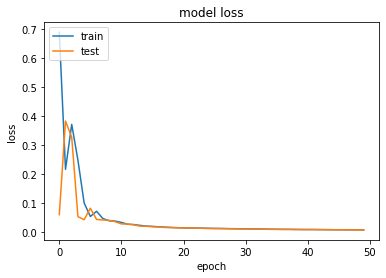

In [ ]:
# summarize history for loss
plt.plot(a_e.history['loss'])
plt.plot(a_e.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 10) Predicting Pixelated Images Using Trained Model 

In [ ]:
predictions = autoencoder.predict(val_low_res_images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


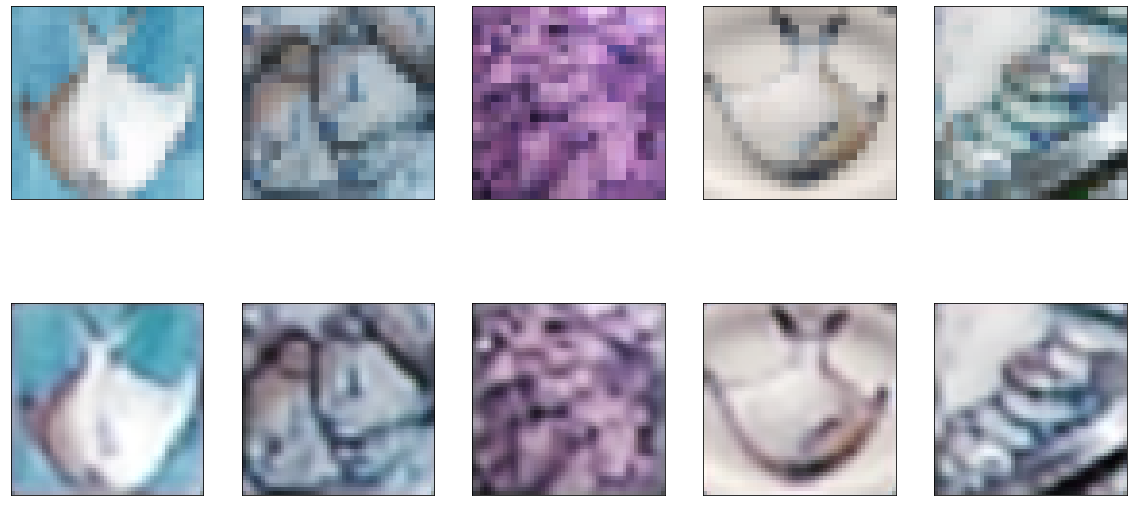

In [ ]:
n = 5
plt.figure(figsize= (20,10))

for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(val_low_res_images[i+20])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(predictions[i+20])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

## 11) Training Neural Network Model again (with Accuracy metric recorded)

In [ ]:
Input_img = Input(shape=(50, 50, 3))
    
#encoding architecture
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(Input_img)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x2 = MaxPool2D( (2, 2))(x2)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)

# decoding architecture
x3 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x3 = UpSampling2D((2, 2))(x3)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(x2)
decoded = Conv2D(3, (3, 3), padding='same')(x1)

model_autoencoder = Model(Input_img, decoded)
model_autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
model_autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 50, 50, 256)       7168      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 50, 50, 128)       295040    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 25, 25, 64)        73792     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 25, 25, 64)        36928     
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 50, 50, 64)        0   

In [ ]:
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=4, verbose=1, mode='auto')

a_e_model = model_autoencoder.fit(train_low_res_images, train_x_reshaped,
            epochs=50,
            batch_size=256,
            shuffle=True,
            validation_data=(val_low_res_images, val_x_reshaped),
            callbacks=[early_stopper])

Epoch 1/50
3/3 [==============================] - 120s 40s/step - loss: 0.4136 - accuracy: 0.3352 - val_loss: 0.0963 - val_accuracy: 0.1748
Epoch 2/50
3/3 [==============================] - 120s 40s/step - loss: 0.2121 - accuracy: 0.3314 - val_loss: 0.3178 - val_accuracy: 0.4095
Epoch 3/50
3/3 [==============================] - 120s 40s/step - loss: 0.2756 - accuracy: 0.4283 - val_loss: 0.1287 - val_accuracy: 0.4094
Epoch 4/50
3/3 [==============================] - 120s 40s/step - loss: 0.1150 - accuracy: 0.4286 - val_loss: 0.0744 - val_accuracy: 0.4049
Epoch 5/50
3/3 [==============================] - 122s 41s/step - loss: 0.0602 - accuracy: 0.4161 - val_loss: 0.0916 - val_accuracy: 0.1749
Epoch 6/50
3/3 [==============================] - 120s 40s/step - loss: 0.0865 - accuracy: 0.1909 - val_loss: 0.0506 - val_accuracy: 0.4525
Epoch 7/50
3/3 [==============================] - 119s 40s/step - loss: 0.0511 - accuracy: 0.4348 - val_loss: 0.0416 - val_accuracy: 0.4834
Epoch 8/50
3/3 [====

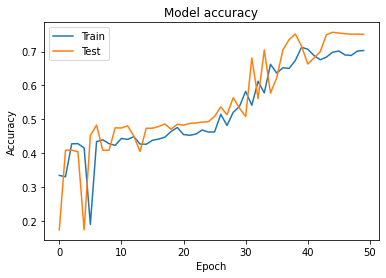

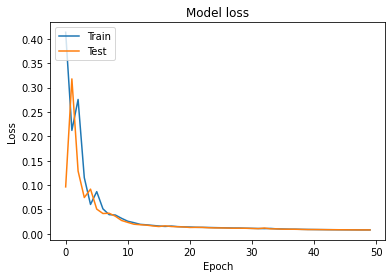

In [ ]:
# summarize history for accuracy
plt.plot(a_e_model.history['accuracy'])
plt.plot(a_e_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(a_e_model.history['loss'])
plt.plot(a_e_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()